Iniziamo importando le solite librerie, che poi mi serviranno durante il corso del progetto. 
questa casella di codice verrà aggiornata ogni qualvolta avrò bisogno di importare nuovi elementi utili allo svolgimento del progetto.

In [233]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


from matplotlib.pyplot import figure 
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

db = pd.read_csv("/Users/giuspru/Desktop/ASNM-NBPOv2.csv" , sep=";" , index_col=False)
db.head(5)
columns = db.columns
print(type(columns))




<class 'pandas.core.indexes.base.Index'>


In [234]:
def separa():
    print("################################################################################\n################################################################################")
    return



Dato che devo capire quali delle features che ho a disposizione mi possono essere utili per lo studio del problema, e soprattutto quali delle seguenti features effettivamente io riesco a capire e potenzialmente un domani a a spiegare durante la presentazione del progetto, printo mediante un piccolo ciclo for tutti nomi delle features che formano le colonne.

In [235]:
columns_array = np.array(columns)
print(type(columns_array))


file_path= "colonne2.txt"
np.savetxt(file_path , columns_array , fmt= '%s' , delimiter= ';'  )


#for i in columns:
    #print(i , "\n")

<class 'numpy.ndarray'>


In [236]:
pd.set_option('display.max_colwidth', len(db.columns))
db.head(5)


,id,label_2,label_poly,label_poly_o,srcIP,dstIP,srcPort,dstPort,srcMAC,dstMAC,...,fourCoefsGonAngleNeg[2],fourCoefsGonAngleNeg[3],fourCoefsGonAngleNeg[4],fourCoefsGonAngleNeg[5],fourCoefsGonAngleNeg[6],fourCoefsGonAngleNeg[7],fourCoefsGonAngleNeg[8],fourCoefsGonAngleNeg[9],label,id.1
0,1,False,3_Other,3_Other,3.125.56.111,3.125.56.202,33772,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,...,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100492
1,2,False,3_Other,3_Other,3.128.56.111,3.128.56.202,60895,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,...,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100496
2,3,False,3_Other,3_Other,3.129.56.111,3.129.56.202,35776,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,...,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100502
3,4,False,3_Other,3_Other,3.131.56.111,3.131.56.202,43105,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,...,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100509
4,5,False,3_Other,3_Other,3.139.56.111,3.139.56.202,56987,4444,08:00:27:f5:32:14,08:00:27:85:b2:60,...,-87.976769,79.361899,142.87929,128.088773,87.155126,44.150765,0.916156,-41.008059,3,100517


In [237]:
print(db.describe())


                id       srcPort       dstPort    finCnt<In>    synCnt<In>  \
count  11445.00000  11445.000000  11445.000000  11445.000000  11445.000000   
mean    5723.00000  50308.821931   1748.094277      1.880734      1.094102   
std     3304.03125  14365.208957   4477.601754     19.428663      0.429965   
min        1.00000   1031.000000     23.000000      0.000000      1.000000   
25%     2862.00000  49985.000000    139.000000      0.000000      1.000000   
50%     5723.00000  52606.000000    445.000000      1.000000      1.000000   
75%     8584.00000  58912.000000    445.000000      1.000000      1.000000   
max    11445.00000  65534.000000  65346.000000    760.000000      6.000000   

         rstCnt<In>    pshCnt<In>     ackCnt<In>    urgCnt<In>    eceCnt<In>  \
count  11445.000000  11445.000000   11445.000000  11445.000000  11445.000000   
mean       0.371778     13.038008      70.116994      0.000175      0.000087   
std        0.525236    846.544498    1684.033189      0.0

A questo punto quello che ho fatto sul file colonne.txt è stata una selezione di features, così da passare dalle 900 features che avevamo all'inizio, ad una cinquantina.
Puo sembrare estremo come campionamento, ma ragionandoci meglio non lo è. 

Si noti infatti che le seguenti features: In-outpkts1s10(20)(tr4kb)(tr2kb) , PolynomIndexes(out-in) , PolyTimeStamp(out-in) , Angle-out(in-out) sono features che sono state Dummizzate. la dummizzazione appirta in totale oltre 800 features. 

Decidendo di eleiminare queste features, viene spiegato il forte decremento del numero di feeatures.

Altre accortezze: tutti i dati calcolati prima in input poi in output e successivamente sommati, vengono sostituiti direttamente con la somma dei vari dati.
Ci si è limitati a media e mediana nel calcolo di features statistiche. 

In [238]:
array_nuovo = []
with open('colonne.txt' , 'r') as file : 
    for line in file:
        array_nuovo.append(line.strip())


print(array_nuovo)


new_db = db[['id', 'label_2', 'label_poly', 'label_poly_o', 'srcIP', 'dstIP', 'srcPort', 'dstPort', 'srcMAC', 'dstMAC', 'srcIPInVlan', 'dstIPInVlan', 'finCnt<All>', 'synCnt<All>',\
              'rstCnt<All>', 'pshCnt<All>', 'ackCnt<All>', 'urgCnt<All>', 'eceCnt<All>', 'cwrCnt<All>', 'rstAckCnt<All>', 'SessDuration', 'BPerSesIn', 'BPerSesOut', 'PktPerSesIn',\
                'PktPerSesOut', 'CntResendPktsIn', 'CntResendPktsOut', 'MedTdiff2Pkts', 'ModTdiff2Pkts', 'MeanTdiff2Pkts', 'SigTdiff2Pkts', 'sumSessPerPort', 'partOfDay',\
                      'BytesPerSessUpload', 'BytesPerSessDownload', 'BytesTCPSess', 'BytesTCPOverhead', 'MeanPktLenSrc', 'MeanPktLenDst', 'sumSYNPerSess', 'sumSACKPerSess',\
                          'ratInoutB', 'ratInoutPkt', 'medTTLIn', 'meanTTLIn', 'medTTLOut', 'meanTTLOut', 'cntDataPktIn', 'cntNondPktIn', 'cntDataPktOut', 'cntNondPktOut',\
                            'meanTCPHdrLen', 'hasFragIp', 'ratFragNfrag', 'label']]

['id', 'label_2', 'label_poly', 'label_poly_o', 'srcIP', 'dstIP', 'srcPort', 'dstPort', 'srcMAC', 'dstMAC', 'srcIPInVlan', 'dstIPInVlan', 'finCnt<All>', 'synCnt<All>', 'rstCnt<All>', 'pshCnt<All>', 'ackCnt<All>', 'urgCnt<All>', 'eceCnt<All>', 'cwrCnt<All>', 'rstAckCnt<All>', 'SessDuration', 'BPerSesIn', 'BPerSesOut', 'PktPerSesIn', 'PktPerSesOut', 'CntResendPktsIn', 'CntResendPktsOut', 'MedTdiff2Pkts', 'ModTdiff2Pkts', 'MeanTdiff2Pkts', 'SigTdiff2Pkts', 'sumSessPerPort', 'partOfDay', 'BytesPerSessUpload', 'BytesPerSessDownload', 'BytesTCPSess', 'BytesTCPOverhead', 'MeanPktLenSrc', 'MeanPktLenDst', 'sumSYNPerSess', 'sumSACKPerSess', 'ratInoutB', 'ratInoutPkt', 'medTTLIn', 'meanTTLIn', 'medTTLOut', 'meanTTLOut', 'cntDataPktIn', 'cntNondPktIn', 'cntDataPktOut', 'cntNondPktOut', 'meanTCPHdrLen', 'hasFragIp', 'ratFragNfrag', 'label']


In [239]:
print(new_db.head(5))
separa()
print(new_db.info())
separa()
print(new_db.describe())
separa()

   id  label_2 label_poly label_poly_o         srcIP         dstIP  srcPort  \
0   1    False    3_Other      3_Other  3.125.56.111  3.125.56.202    33772   
1   2    False    3_Other      3_Other  3.128.56.111  3.128.56.202    60895   
2   3    False    3_Other      3_Other  3.129.56.111  3.129.56.202    35776   
3   4    False    3_Other      3_Other  3.131.56.111  3.131.56.202    43105   
4   5    False    3_Other      3_Other  3.139.56.111  3.139.56.202    56987   

   dstPort             srcMAC             dstMAC  ...  medTTLOut  meanTTLOut  \
0     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
1     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
2     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
3     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
4     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   

   cntDataPktIn  cntNondPktIn  cntDataPktOut

to do: 
- drop 'id' , 'label_poly' , 'label_poly_o' , 'srcIP', 'dstIP', 'srcPort', 'dstPort', 'srcMAC', 'dstMAC', 'srcIPInVlan', 'dstIPInVlan' , 'partOfDay' 

In [240]:
element_to_drop = ['id' , 'label_poly' , 'label_poly_o' , 'srcIP', 'dstIP', 'srcPort', 'dstPort', 'srcMAC', 'dstMAC', 'srcIPInVlan', 'dstIPInVlan' , 'partOfDay']
new_db_dropped = new_db.drop(element_to_drop , axis=1)

print(new_db.head(5))
print(new_db_dropped.head(5))

   id  label_2 label_poly label_poly_o         srcIP         dstIP  srcPort  \
0   1    False    3_Other      3_Other  3.125.56.111  3.125.56.202    33772   
1   2    False    3_Other      3_Other  3.128.56.111  3.128.56.202    60895   
2   3    False    3_Other      3_Other  3.129.56.111  3.129.56.202    35776   
3   4    False    3_Other      3_Other  3.131.56.111  3.131.56.202    43105   
4   5    False    3_Other      3_Other  3.139.56.111  3.139.56.202    56987   

   dstPort             srcMAC             dstMAC  ...  medTTLOut  meanTTLOut  \
0     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
1     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
2     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
3     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   
4     4444  08:00:27:f5:32:14  08:00:27:85:b2:60  ...       64.0        64.0   

   cntDataPktIn  cntNondPktIn  cntDataPktOut

Prima di iniziare l'EDA è necessario fare una distinzione, creando due differenti dataset uno che presenta come etichetta finale due possibili valori (attacco, non attacco) e l'altro che invece presenta tre etichette (traffico legittimo , attacco , attacco offuscato)

In [241]:
new_db_dropped.head(5)
db_binario = new_db_dropped.drop("label" , axis = 1)
db_ternario = new_db_dropped.drop("label_2" , axis = 1)


#print(db_binario.head(5))
#print(db_ternario.head(5))


print(db_binario.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11445 entries, 0 to 11444
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   label_2               11445 non-null  bool   
 1   finCnt<All>           11445 non-null  int64  
 2   synCnt<All>           11445 non-null  int64  
 3   rstCnt<All>           11445 non-null  int64  
 4   pshCnt<All>           11445 non-null  int64  
 5   ackCnt<All>           11445 non-null  int64  
 6   urgCnt<All>           11445 non-null  int64  
 7   eceCnt<All>           11445 non-null  int64  
 8   cwrCnt<All>           11445 non-null  int64  
 9   rstAckCnt<All>        11445 non-null  int64  
 10  SessDuration          11445 non-null  float64
 11  BPerSesIn             11445 non-null  int64  
 12  BPerSesOut            11445 non-null  int64  
 13  PktPerSesIn           11445 non-null  int64  
 14  PktPerSesOut          11445 non-null  int64  
 15  CntResendPktsIn    

EDA

In [242]:
db_binario =  db_binario.rename(columns ={"label_2" : "TrafficoB"})
db_ternario = db_ternario.rename(columns = {"label" : "TrafficoT"})

db_binario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11445 entries, 0 to 11444
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TrafficoB             11445 non-null  bool   
 1   finCnt<All>           11445 non-null  int64  
 2   synCnt<All>           11445 non-null  int64  
 3   rstCnt<All>           11445 non-null  int64  
 4   pshCnt<All>           11445 non-null  int64  
 5   ackCnt<All>           11445 non-null  int64  
 6   urgCnt<All>           11445 non-null  int64  
 7   eceCnt<All>           11445 non-null  int64  
 8   cwrCnt<All>           11445 non-null  int64  
 9   rstAckCnt<All>        11445 non-null  int64  
 10  SessDuration          11445 non-null  float64
 11  BPerSesIn             11445 non-null  int64  
 12  BPerSesOut            11445 non-null  int64  
 13  PktPerSesIn           11445 non-null  int64  
 14  PktPerSesOut          11445 non-null  int64  
 15  CntResendPktsIn    

In [243]:
db_ternario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11445 entries, 0 to 11444
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   finCnt<All>           11445 non-null  int64  
 1   synCnt<All>           11445 non-null  int64  
 2   rstCnt<All>           11445 non-null  int64  
 3   pshCnt<All>           11445 non-null  int64  
 4   ackCnt<All>           11445 non-null  int64  
 5   urgCnt<All>           11445 non-null  int64  
 6   eceCnt<All>           11445 non-null  int64  
 7   cwrCnt<All>           11445 non-null  int64  
 8   rstAckCnt<All>        11445 non-null  int64  
 9   SessDuration          11445 non-null  float64
 10  BPerSesIn             11445 non-null  int64  
 11  BPerSesOut            11445 non-null  int64  
 12  PktPerSesIn           11445 non-null  int64  
 13  PktPerSesOut          11445 non-null  int64  
 14  CntResendPktsIn       11445 non-null  int64  
 15  CntResendPktsOut   

In [244]:
print(db_binario['TrafficoB'].unique())
print(db_binario['TrafficoB'].value_counts())
separa()

print(db_ternario['TrafficoT'].unique())
print(db_ternario['TrafficoT'].value_counts())
separa()


db_binario["TrafficoB"] = db_binario["TrafficoB"].astype(int)
db_binario["hasFragIp"] = db_binario["hasFragIp"].astype(int)
print(db_binario.info())
separa()

db_ternario["hasFragIp"] = db_ternario["hasFragIp"].astype(int)
print(db_ternario.info())
separa()






[False  True]
False    10805
True       640
Name: TrafficoB, dtype: int64
################################################################################
################################################################################
[3 1 2]
3    10805
2      478
1      162
Name: TrafficoT, dtype: int64
################################################################################
################################################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11445 entries, 0 to 11444
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TrafficoB             11445 non-null  int64  
 1   finCnt<All>           11445 non-null  int64  
 2   synCnt<All>           11445 non-null  int64  
 3   rstCnt<All>           11445 non-null  int64  
 4   pshCnt<All>           11445 non-null  int64  
 5   ackCnt<All>           11445 non-null  int64  
 6   urgCnt<Al

In [245]:
def nomi(x):
    if x == 0:
        x = "Legittimo"
    else:
        x = "Attacco"
    return x

db_binario["TrafficoB"] = db_binario["TrafficoB"].apply(nomi)

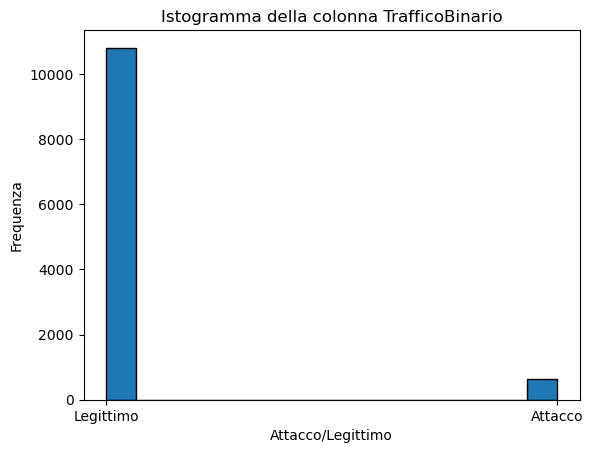

In [246]:
plt.hist(db_binario["TrafficoB"], bins='auto', edgecolor='black' )
plt.xlabel('Attacco/Legittimo')
plt.ylabel('Frequenza')
plt.title('Istogramma della colonna TrafficoBinario')

plt.show()

Legittimo           10805
AttaccoOffuscato      478
AttaccoDiretto        162
Name: TrafficoT, dtype: int64
################################################################################
################################################################################


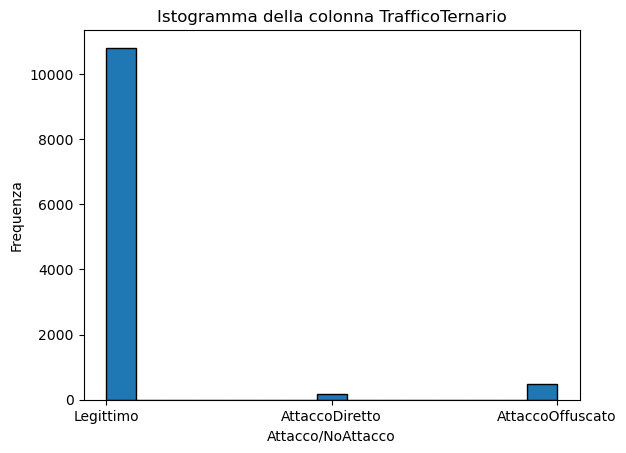

In [247]:
def sostituisconome(x):
    if x == 1:
        x = "AttaccoDiretto"
    elif x == 2:
        x = "AttaccoOffuscato"
    elif x == 3:
        x = "Legittimo"
    return x

db_ternario["TrafficoT"] = db_ternario["TrafficoT"].apply(sostituisconome)
print(db_ternario["TrafficoT"].value_counts())


separa()

plt.hist(db_ternario["TrafficoT"], bins='auto', edgecolor='black')
plt.xlabel('Attacco/NoAttacco')
plt.ylabel('Frequenza')
plt.title('Istogramma della colonna TrafficoTernario')

plt.show()

In [248]:
print(db_binario['TrafficoB'].unique())
print(db_binario['TrafficoB'].value_counts())
separa()

print(db_ternario['TrafficoT'].unique())
print(db_ternario['TrafficoT'].value_counts())
separa()

['Legittimo' 'Attacco']
Legittimo    10805
Attacco        640
Name: TrafficoB, dtype: int64
################################################################################
################################################################################
['Legittimo' 'AttaccoDiretto' 'AttaccoOffuscato']
Legittimo           10805
AttaccoOffuscato      478
AttaccoDiretto        162
Name: TrafficoT, dtype: int64
################################################################################
################################################################################


In [249]:
print(db_ternario.info())
separa()
print(db_binario.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11445 entries, 0 to 11444
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   finCnt<All>           11445 non-null  int64  
 1   synCnt<All>           11445 non-null  int64  
 2   rstCnt<All>           11445 non-null  int64  
 3   pshCnt<All>           11445 non-null  int64  
 4   ackCnt<All>           11445 non-null  int64  
 5   urgCnt<All>           11445 non-null  int64  
 6   eceCnt<All>           11445 non-null  int64  
 7   cwrCnt<All>           11445 non-null  int64  
 8   rstAckCnt<All>        11445 non-null  int64  
 9   SessDuration          11445 non-null  float64
 10  BPerSesIn             11445 non-null  int64  
 11  BPerSesOut            11445 non-null  int64  
 12  PktPerSesIn           11445 non-null  int64  
 13  PktPerSesOut          11445 non-null  int64  
 14  CntResendPktsIn       11445 non-null  int64  
 15  CntResendPktsOut   

<AxesSubplot:xlabel='TrafficoB', ylabel='Count'>

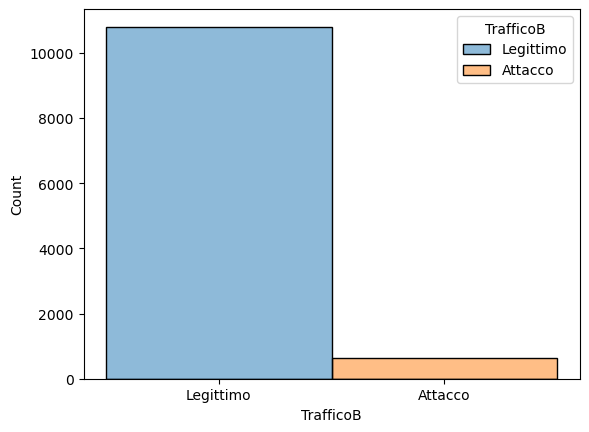

In [250]:
sns.histplot(data=db_binario, x='TrafficoB', bins='auto', kde=False, edgecolor='black' , hue="TrafficoB")

<AxesSubplot:xlabel='TrafficoT', ylabel='Count'>

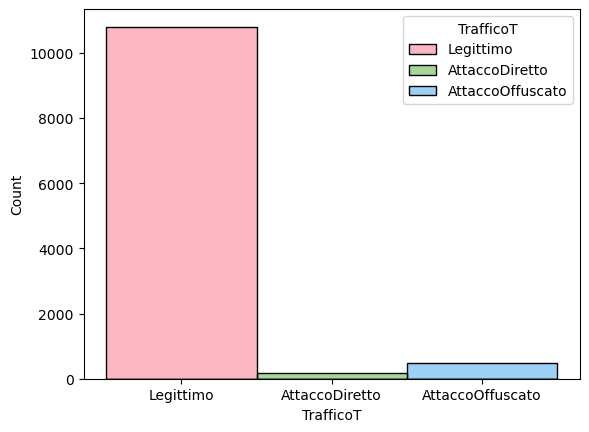

In [251]:
sns.histplot(data=db_ternario, x='TrafficoT', bins='auto', kde=False, edgecolor='black' ,  palette='husl' , hue= "TrafficoT")

Mediante questi istogrammi che riportano semplicemente come si distribuiscono le varie tipologie di traffico che analizziamo, riscontriamo immediatamente un problema. Il dataset risulta essere fortemente sbilanciato, infatti il traffico legittimo (10850) ricopre circa il 95% del dataset, e il restante 5% (640 campioni) viene classificato come Attacco.

Un comportamento del genere da parte del dataset ad ogni modo era preventivabile, infatti, durante una raccolta di traffico la norma è raccogliere traffico legittimo e l'eccezione è quella del traffico di attacco!

Proprio per questo, verrà utilizzato l' F1-score come metrica di investigazione!


<Figure size 600x1000 with 0 Axes>

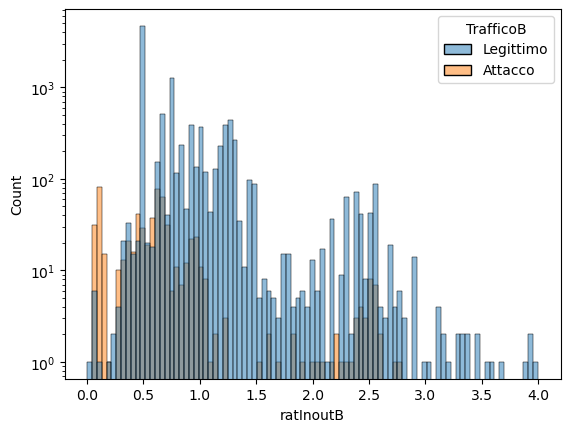

<Figure size 600x1000 with 0 Axes>

In [278]:
sns.histplot(data= db_binario , x = 'ratInoutB' , bins='auto', kde=False, edgecolor='black' , hue="TrafficoB" , binrange=(0,4))
plt.yscale('log')
plt.figure(figsize=(6 , 10))


<Figure size 600x1000 with 0 Axes>

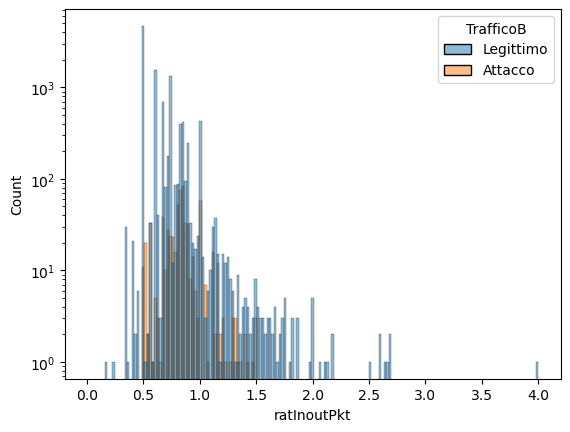

<Figure size 600x1000 with 0 Axes>

In [282]:
sns.histplot(data= db_binario , x = 'ratInoutPkt' , bins='auto', kde=False, edgecolor='black' , hue="TrafficoB" , binrange=(0,4))
plt.yscale('log')
plt.figure(figsize=(6 , 10))

<Figure size 600x1000 with 0 Axes>

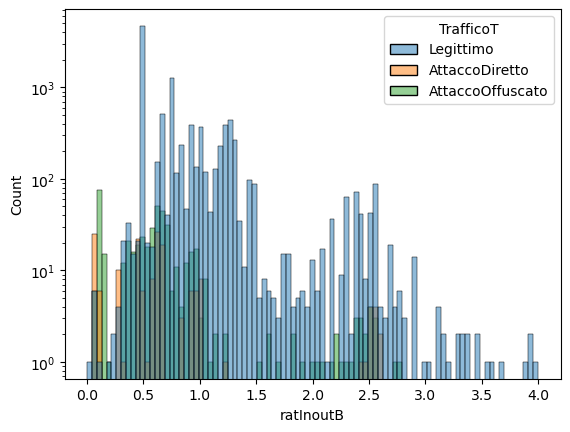

<Figure size 600x1000 with 0 Axes>

In [284]:
sns.histplot(data= db_ternario , x = 'ratInoutB' , bins='auto', kde=False, edgecolor='black' , hue="TrafficoT" , binrange=(0,4))
plt.yscale('log')
plt.figure(figsize=(6 , 10))

<Figure size 600x1000 with 0 Axes>

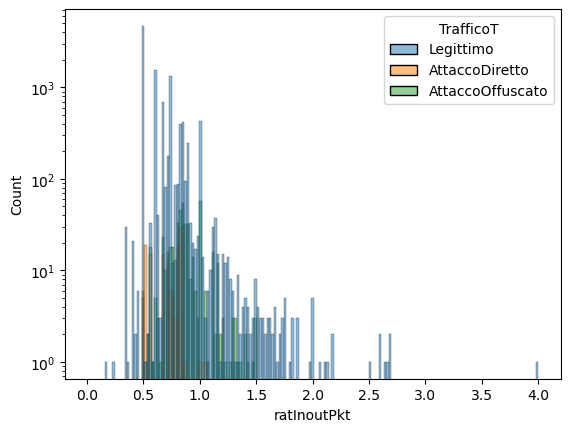

<Figure size 600x1000 with 0 Axes>

In [285]:
sns.histplot(data= db_ternario , x = 'ratInoutPkt' , bins='auto', kde=False, edgecolor='black' , hue="TrafficoT" , binrange=(0,4))
plt.yscale('log')
plt.figure(figsize=(6,10))

Forse si vede meglio con uno scatter plot:

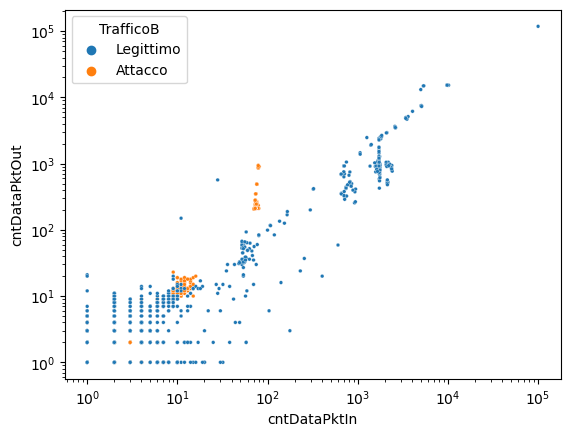

In [294]:
sns.scatterplot(x='cntDataPktIn', y='cntDataPktOut', hue='TrafficoB', data=db_binario , s=7)
plt.yscale('log')
plt.xscale('log')


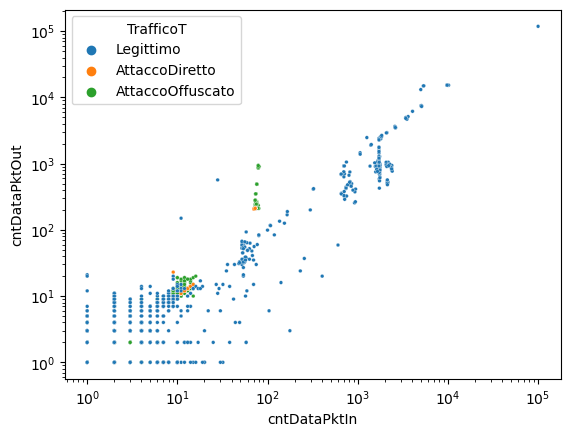

In [295]:
sns.scatterplot(x='cntDataPktIn', y='cntDataPktOut', hue='TrafficoT', data=db_ternario , s=7)
plt.yscale('log')
plt.xscale('log')

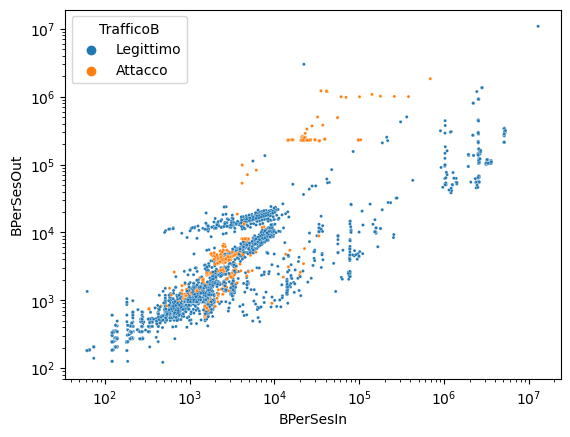

In [302]:
sns.scatterplot(x='BPerSesIn', y='BPerSesOut', hue='TrafficoB', data=db_binario , s=5)
plt.yscale('log')
plt.xscale('log')

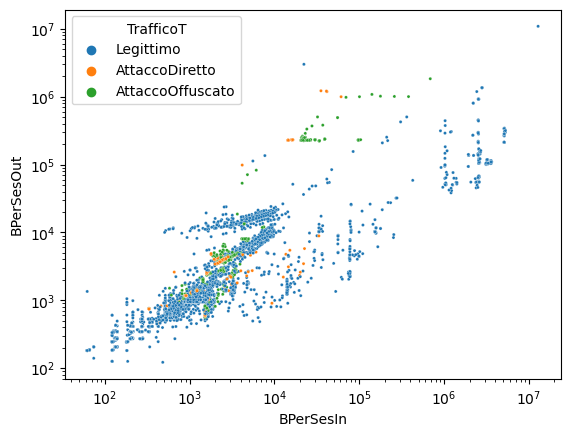

In [303]:
sns.scatterplot(x='BPerSesIn', y='BPerSesOut', hue='TrafficoT', data=db_ternario , s=5)
plt.yscale('log')
plt.xscale('log')

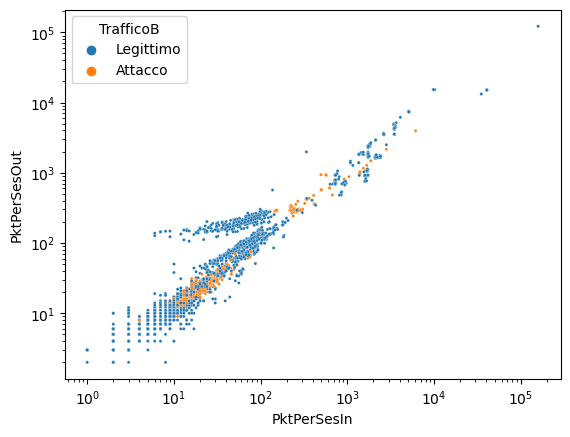

In [304]:
sns.scatterplot(x='PktPerSesIn', y='PktPerSesOut', hue='TrafficoB', data=db_binario , s=5)
plt.yscale('log')
plt.xscale('log')


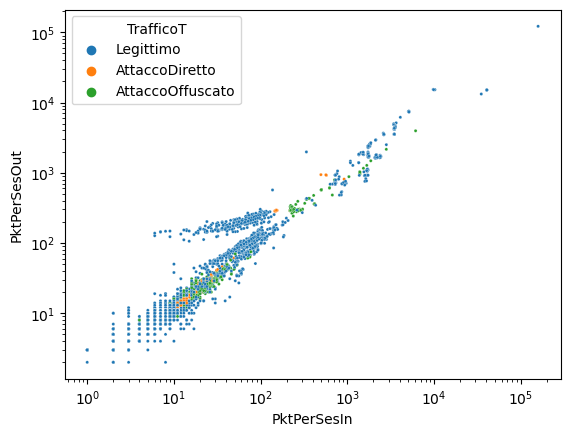

In [305]:
sns.scatterplot(x='PktPerSesIn', y='PktPerSesOut', hue='TrafficoT', data=db_ternario , s=5)
plt.yscale('log')
plt.xscale('log')